# In-Class Exercise on Spam Filtering  
In this exercise, we will use powerful tools such as pandas and sklearn to distinguish between spam and regular emails based on the information contained in the emails themselves.


## Download Data  
The data is downloaded using gdown into the same folder as the current file. After downloading, we unzip the received data.

In [14]:
import gdown
import zipfile
import os

url = "https://drive.google.com/uc?id=1bTJKchSInd3IgLs41b1_-Gd-T36a_pal"
zip_path = "downloaded_data.zip"  # Change this if needed

gdown.download(url, zip_path, quiet=False)


with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall()

os.remove(zip_path)



Downloading...
From: https://drive.google.com/uc?id=1bTJKchSInd3IgLs41b1_-Gd-T36a_pal
To: c:\HCMUT\Study\HK242\NLP\Exercise\Lab4\downloaded_data.zip
100%|██████████| 1.95M/1.95M [00:00<00:00, 2.96MB/s]


## Using Pandas for Storage  
Pandas is a commonly used library for storing data utilized in machine learning processes, offering functions suitable for large datasets and high performance. We read the data from the unzipped file into a `DataFrame`.


In [15]:
import pandas as pd
#### YOUR CODE HERE ####
df = pd.read_csv("spam_ham_dataset.csv")
#### END YOUR CODE #####

Visualizing Data with 5 Examples 

In [16]:
#### YOUR CODE HERE ####
df.head()
#### END YOUR CODE #####

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


## Data Preprocessing  
As we can see, the current data contains Windows newline characters `\r\n`, which may cause confusion. To simplify, we replace them with spaces. You can also apply additional Pandas methods (e.g., removing the "Subject:" prefix, extracting the first line, etc.).


In [17]:
#### YOUR CODE HERE ####
df.replace(to_replace=r'\r\n', value=' ', regex=True, inplace=True)

df["text"] = df["text"].str.replace(r"^Subject:\s*", "", regex=True)
# Convert labels: 'spam' → 1, 'ham' → 0
df["label"] = df["label"].map({"spam": 1, "ham": 0})

df.head()
#### END YOUR CODE #####


,Unnamed: 0,label,text,label_num
0,605,0,enron methanol ; meter # : 988291 this is a fo...,0
1,2349,0,"hpl nom for january 9 , 2001 ( see attached fi...",0
2,3624,0,"neon retreat ho ho ho , we ' re around to that...",0
3,4685,1,"photoshop , windows , office . cheap . main tr...",1
4,2030,0,re : indian springs this deal is to book the t...,0


## Building Model  
First, we perform vectorization of the input data using `CountVectorizer`, aiming to convert text data into numerical representations. `CountVectorizer` creates a vocabulary of words appearing in the dataset and generates a corresponding vector for each sample, representing the word frequencies within that sample.


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
#### YOUR CODE HERE ####
corpus=df["text"].fillna("")
vectorizer=CountVectorizer()
X = vectorizer.fit_transform(corpus)
print("Feature names: ", vectorizer.get_feature_names_out())
print(X.toarray())
pass
#### END YOUR CODE #####

Feature names:  ['00' '000' '0000' ... 'zzocb' 'zzso' 'zzsyt']
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Next, we apply the TF-IDF algorithm to the obtained vector. The output remains a sparse matrix but is now adjusted for the rarity of each word.


In [19]:
from sklearn.feature_extraction.text import TfidfTransformer
#### YOUR CODE HERE ####
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X)
print(X_tfidf.toarray())
#### END YOUR CODE #####

[[0.0995327 0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]]


We can generate n-gram data using the `ngram_range` argument in `CountVectorizer`, allowing the program to capture commonly occurring n-word phrases in the dataset.  

Additionally, `CountVectorizer` and `TfidfTransformer` have a combined wrapper that integrates both processes into one while accepting their shared arguments: `TfidfVectorizer`.


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
#### YOUR CODE HERE ####
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))  
X_tfidf_ngrams = tfidf_vectorizer.fit_transform(corpus)
print(tfidf_vectorizer.get_feature_names_out())
print(X_tfidf_ngrams.toarray())

#### END YOUR CODE #####

['00' '00 00' '00 000' ... 'zzso 02' 'zzsyt' 'zzsyt sudlz']
[[0.05027952 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


After completing the vectorization steps, we proceed to split the data into training and testing sets to evaluate the model's performance.








In [21]:
from sklearn.model_selection import train_test_split
#### YOUR CODE HERE ####
y=df["label"]
X_train, X_test, y_train, y_test=train_test_split(X_tfidf_ngrams, y, test_size=0.2)
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")
#### END YOUR CODE #####

Training set: (4136, 312583), Testing set: (1035, 312583)


Once we have the vectorized data, we use a Bayesian model to compute the results, such as `GaussianNB`. Other machine learning models can also be applied here (e.g., `LogisticRegression`, `SVM`).  

**Note:** The `todense()` function is used to convert a sparse matrix to a dense matrix, which may cause `MemoryError` for large datasets. Consider using models that support training with sparse matrices or implementing your own solution here.


In [22]:
from sklearn.naive_bayes import MultinomialNB

#### YOUR CODE HERE ####
model = MultinomialNB()
model.fit(X_train, y_train)  
y_pred=model.predict(X_test)



#### END YOUR CODE #####

## Metrics and Visualization  
To evaluate the model's performance, we can compute the F1 score or accuracy. In this case, we use the F1 score since the class distribution in the dataset is imbalanced (with 25% spam).  

Additionally, we can plot the ROC-AUC curve to visualize different cutoff points for the model.


Model F1-score: 0.7762


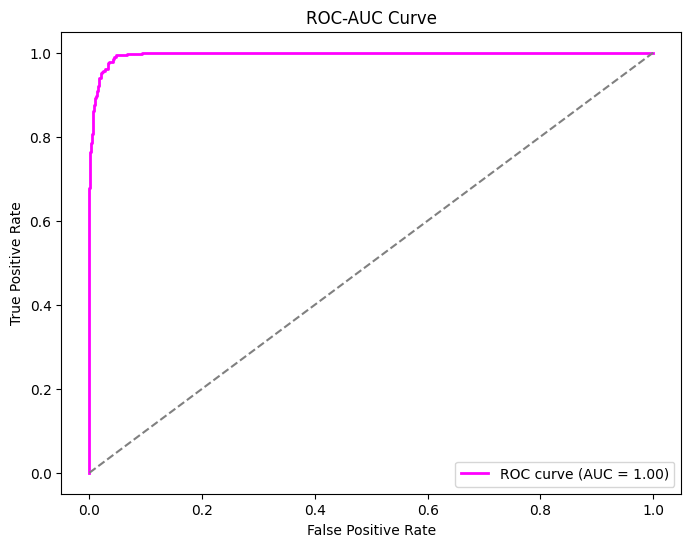

In [23]:
#### YOUR CODE HERE ####
from sklearn.metrics import f1_score,roc_curve, auc
import matplotlib.pyplot as plt

f1 = f1_score(y_test, y_pred, average="weighted")
print(f"Model F1-score: {f1:.4f}")

y_prob = model.predict_proba(X_test)[:, 1]  
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="magenta", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonal line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend(loc="lower right")
plt.show()


pass
#### END YOUR CODE #####

## Alternative: Co-occurrence and TruncatedSVD  

In language, semantically related words (e.g., *doctor* and *patient*) often appear in the same context. Based on this idea, we can construct a co-occurrence matrix that captures word occurrences within sentences. This allows us to represent words in a shared vector space rather than relying on simple frequency counts.  

A co-occurrence matrix with a window spanning the entire sentence can be built using the existing `CountVectorizer` data or manually constructed.


In [25]:
#### YOUR CODE HERE ####
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
co_occurrence_matrix = X.T @ X

svd=TruncatedSVD(n_components=100)
word_embeddings = svd.fit_transform(co_occurrence_matrix)  # Shape: (n_features, n_components)

X_svd = X @ word_embeddings

X_train, X_test, y_train, y_test = train_test_split(X_svd, df["label"], test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred, average="weighted")

print(f"Model F1-score: {f1:.4f}")
#### END YOUR CODE #####

Model F1-score: 0.9500


c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Alternative: HashingVectorizer  

For large datasets with a high vocabulary size, using `CountVectorizer` for vectorized data storage can be resource-intensive. An alternative approach is to use `HashingVectorizer`. Unlike `CountVectorizer`, which assigns a unique ID to each word/ngram, `HashingVectorizer` maps multiple words to the same ID using a hashing function.  

The choice between these two methods involves a trade-off between memory usage (e.g., RAM) and model quality. Adjusting the `n_features` parameter helps balance this trade-off to ensure that model performance does not degrade significantly.


In [ ]:
#### YOUR CODE HERE ####
from sklearn.feature_extraction.text import HashingVectorizer

vectorizer = HashingVectorizer(n_features=1024, alternate_sign=False)  
X_hash=vectorizer.transform(corpus)

X_train, X_test, y_train, y_test = train_test_split(X_hash, df["label"], test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred, average="weighted")
print(f"Model F1-score: {f1:.4f}")

#### END YOUR CODE ##
###

Model F1-score: 0.9524


## Comparison and Analysis of Feature Extraction Methods  

TfidfVectorizer assigns importance scores to words based on their frequency and uniqueness across documents, making it useful for text classification but prone to high dimensionality. TruncatedSVD reduces dimensionality by extracting latent features from text representations (like TF-IDF), improving efficiency but losing interpretability. Hashing Vectorizer HashingVectorizer uses a hash function to map words into a fixed-length feature space, making it memory-efficient and scalable but prone to hash collisions and lack of interpretability. TF-IDF is ideal for capturing word importance, TruncatedSVD for reducing large feature spaces, and HashingVectorizer for fast, large-scale text processing.